# Importy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

___
# Zadanie 1

In [2]:
def prosta_regresji_mnk(x, y):
    n = len(x)
    x_mean = sum(x) / n
    y_mean = sum(y) / n
    numerator = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n))
    denominator = sum((x[i] - x_mean) ** 2 for i in range(n))
    b1 = numerator / denominator
    b0 = y_mean - b1 * x_mean
    return b0, b1

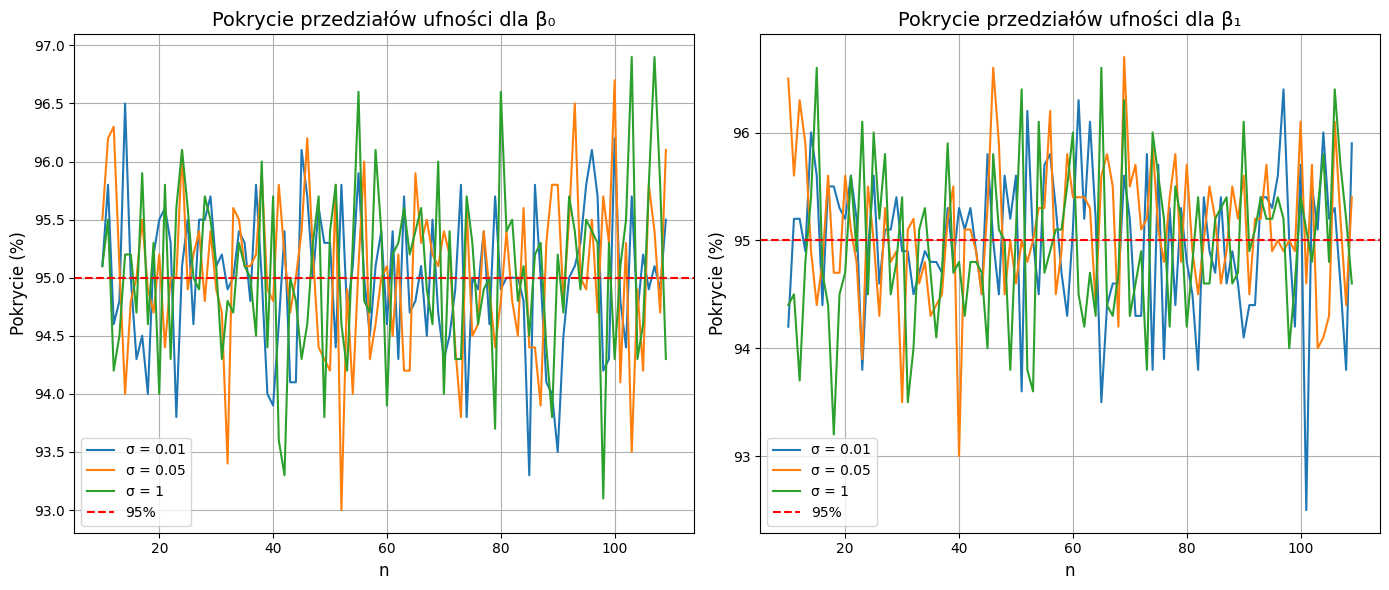

In [6]:
beta_0 = 2
beta_1 = 5
M = 1000
sigma_values = [0.01, 0.05, 1]
n_values = np.arange(10, 110, 1)
alfa = 0.05

coverage_beta_0 = {sigma: [] for sigma in sigma_values}
coverage_beta_1 = {sigma: [] for sigma in sigma_values}

for sigma in sigma_values:
    for n in n_values:
        beta_0_count = 0
        beta_1_count = 0
        for i in range(M):
            x = np.linspace(1, n, n)
            epsilon = np.random.normal(0, sigma, n)
            y = beta_0 + beta_1 * x + epsilon
            b0_hat, b1_hat = prosta_regresji_mnk(x, y)

            var_b0 = sigma**2 * (1/n + (np.mean(x)**2) / np.sum((x - np.mean(x))**2))
            var_b1 = sigma**2 / np.sum((x - np.mean(x))**2)
            kwantyl = norm.ppf(1 - alfa / 2)

            przedzial_b1 = [b1_hat - kwantyl * np.sqrt(var_b1), b1_hat + kwantyl * np.sqrt(var_b1)]
            przedzial_b0 = [b0_hat - kwantyl * np.sqrt(var_b0), b0_hat + kwantyl * np.sqrt(var_b0)]
            
            if przedzial_b0[0] <= beta_0 <= przedzial_b0[1]:
                beta_0_count += 1
            if przedzial_b1[0] <= beta_1 <= przedzial_b1[1]:
                beta_1_count += 1

        coverage_beta_0[sigma].append((beta_0_count/M)*100)
        coverage_beta_1[sigma].append((beta_1_count/M)*100)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for sigma in sigma_values:
    plt.plot(n_values, coverage_beta_0[sigma], label=f'σ = {sigma}')
plt.axhline(y=95, color='r', linestyle='--', label='95%')
plt.xlabel('n', fontsize=12)
plt.ylabel('Pokrycie (%)', fontsize=12)
plt.title('Pokrycie przedziałów ufności dla β₀', fontsize=14)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for sigma in sigma_values:
    plt.plot(n_values, coverage_beta_1[sigma], label=f'σ = {sigma}')
plt.axhline(y=95, color='r', linestyle='--', label='95%')
plt.xlabel('n', fontsize=12)
plt.ylabel('Pokrycie (%)', fontsize=12)
plt.title('Pokrycie przedziałów ufności dla β₁', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

___
# Zadanie 2

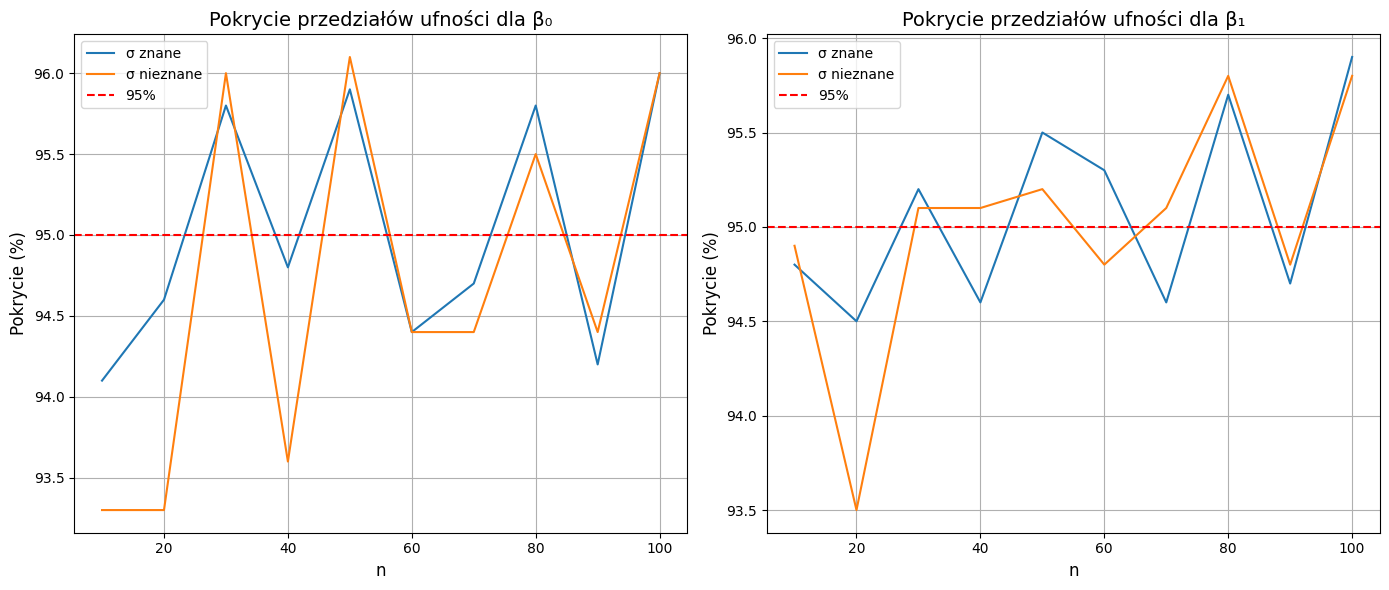

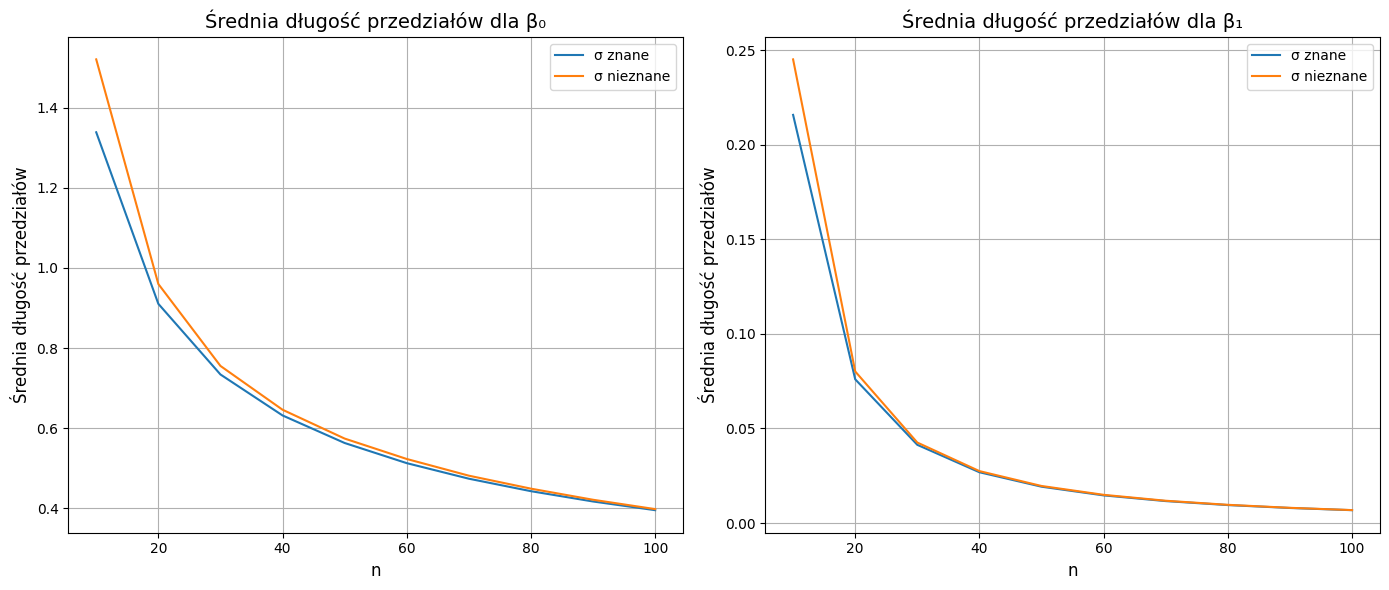

In [7]:
beta_0 = 2
beta_1 = 5
M = 1000
sigma = 0.5
n_values = np.arange(10, 110, 10)
alfa = 0.05

coverage_beta_0_znane = []
coverage_beta_1_znane = []
coverage_beta_0_nieznane = []
coverage_beta_1_nieznane = []

beta_0_znane_len = []
beta_1_znane_len = []
beta_0_nieznane_len = []
beta_1_nieznane_len = []

for n in n_values:
    beta_0_count_znane = 0
    beta_1_count_znane = 0
    beta_0_count_nieznane = 0
    beta_1_count_nieznane = 0

    b0_lem_known = []
    b1_lem_known = []
    b0_lem_unknown = []
    b1_lem_unknown = []
    
    for i in range(M):
        x = np.linspace(1, n, n)
        epsilon = np.random.normal(0, sigma, n)

        y = beta_0 + beta_1 * x + epsilon

        b0_hat, b1_hat = prosta_regresji_mnk(x, y)

        y_hat = b0_hat + b1_hat * x 

        var_b0 = sigma**2 * (1/n + (np.mean(x)**2) / np.sum((x - np.mean(x))**2))
        var_b1 = sigma**2 / np.sum((x - np.mean(x))**2)

        kwantyl = norm.ppf(1 - alfa / 2)
        kwantyl_t = t.ppf(1 - alfa / 2, df = n - 2)

        s2 = 1 / (n - 2) * np.sum((y - y_hat) ** 2)
        s = np.sqrt(s2)

        SE_beta_0 = s * np.sqrt((1/n + (np.mean(x)**2) / np.sum((x - np.mean(x))**2)))
        SE_beta_1 = s / np.sqrt(np.sum((x - np.mean(x))**2))

        przedzial_b1_znane = [b1_hat - kwantyl * np.sqrt(var_b1), b1_hat + kwantyl * np.sqrt(var_b1)]
        przedzial_b0_znane = [b0_hat - kwantyl * np.sqrt(var_b0), b0_hat + kwantyl * np.sqrt(var_b0)]

        przedzial_b0_nieznane = [b0_hat - kwantyl_t * SE_beta_0, b0_hat + kwantyl_t * SE_beta_0]
        przedzial_b1_nieznane = [b1_hat - kwantyl_t * SE_beta_1, b1_hat + kwantyl_t * SE_beta_1]

        len_b0_znane = przedzial_b0_znane[1] - przedzial_b0_znane[0]
        len_b1_znane = przedzial_b1_znane[1] - przedzial_b1_znane[0]

        len_b0_nieznane = przedzial_b0_nieznane[1] - przedzial_b0_nieznane[0]
        len_b1_nieznane = przedzial_b1_nieznane[1] - przedzial_b1_nieznane[0]

        if przedzial_b0_znane[0] <= beta_0 <= przedzial_b0_znane[1]:
            beta_0_count_znane += 1
        if przedzial_b1_znane[0] <= beta_1 <= przedzial_b1_znane[1]:
            beta_1_count_znane += 1
        if przedzial_b0_nieznane[0] <= beta_0 <= przedzial_b0_nieznane[1]:
            beta_0_count_nieznane += 1
        if przedzial_b1_nieznane[0] <= beta_1 <= przedzial_b1_nieznane[1]:
            beta_1_count_nieznane += 1

        b0_lem_known.append(len_b0_znane)
        b1_lem_known.append(len_b1_znane)
        b0_lem_unknown.append(len_b0_nieznane)
        b1_lem_unknown.append(len_b1_nieznane)

    beta_0_znane_len.append(np.mean(b0_lem_known))
    beta_1_znane_len.append(np.mean(b1_lem_known))
    beta_0_nieznane_len.append(np.mean(b0_lem_unknown))
    beta_1_nieznane_len.append(np.mean(b1_lem_unknown))

    coverage_beta_0_znane.append((beta_0_count_znane/M) * 100)
    coverage_beta_1_znane.append((beta_1_count_znane/M) * 100)
    coverage_beta_0_nieznane.append((beta_0_count_nieznane/M) * 100)
    coverage_beta_1_nieznane.append((beta_1_count_nieznane/M) * 100)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_values, coverage_beta_0_znane, label=f'σ znane')
plt.plot(n_values, coverage_beta_0_nieznane, label=f'σ nieznane')
plt.axhline(y=95, color='r', linestyle='--', label='95%')
plt.xlabel('n', fontsize=12)
plt.ylabel('Pokrycie (%)', fontsize=12)
plt.title('Pokrycie przedziałów ufności dla β₀', fontsize=14)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_values, coverage_beta_1_znane, label=f'σ znane')
plt.plot(n_values, coverage_beta_1_nieznane, label=f'σ nieznane')
plt.axhline(y=95, color='r', linestyle='--', label='95%')
plt.xlabel('n', fontsize=12)
plt.ylabel('Pokrycie (%)', fontsize=12)
plt.title('Pokrycie przedziałów ufności dla β₁', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_values, beta_0_znane_len, label=f'σ znane')
plt.plot(n_values, beta_0_nieznane_len, label=f'σ nieznane')
plt.xlabel('n', fontsize=12)
plt.ylabel('Średnia długość przedziałów', fontsize=12)
plt.title('Średnia długość przedziałów dla β₀', fontsize=14)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_values, beta_1_znane_len, label=f'σ znane')
plt.plot(n_values, beta_1_nieznane_len, label=f'σ nieznane')
plt.xlabel('n', fontsize=12)
plt.ylabel('Średnia długość przedziałów', fontsize=12)
plt.title('Średnia długość przedziałów dla β₁', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

___
# Zadanie 3

B0: 5.291242398237953, B1: 20.563945911726634


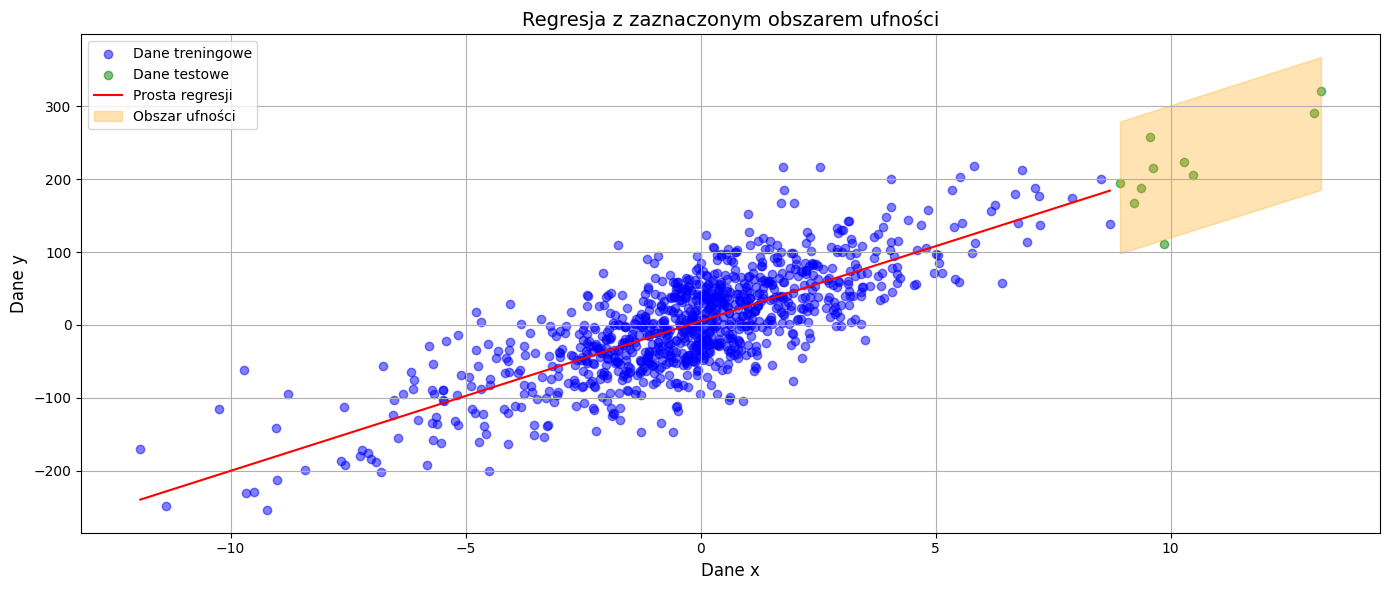

In [10]:
dane = np.loadtxt('Lista1/zad4.txt')
x = dane[:, 0]
y = dane[:, 1]

x_sorted_indices = np.argsort(x)
x_sorted = x[x_sorted_indices]
y_sorted = y[x_sorted_indices]

x_train = x_sorted[:990]
y_train = y_sorted[:990]
x_test = x_sorted[990:]
y_test = y_sorted[990:]

b0, b1 = prosta_regresji_mnk(x_train, y_train)
print(f'B0: {b0}, B1: {b1}')

y_pred = b0 + b1 * x_test

n = len(x_train)
x_mean = np.mean(x_train)
alpha = 0.05
s2 = np.sum((y_train - (b0 + b1 * x_train))**2) / (n - 2)
t_value = t.ppf(1 - alpha / 2, n - 2)

lower_bounds = []
upper_bounds = []
for i in range(len(x_test)):
    se = np.sqrt(s2 * (1 + (1 / n) + ((x_test[i] - x_mean) ** 2) / np.sum((x_train - x_mean) ** 2)))
    lower_bounds.append(y_pred[i] - t_value * se)
    upper_bounds.append(y_pred[i] + t_value * se)

plt.figure(figsize=(14, 6))
plt.scatter(x_train, y_train, color='blue', label='Dane treningowe', alpha=0.5)
plt.scatter(x_test, y_test, color='green', label='Dane testowe', alpha=0.5)
plt.plot(x_train, b0 + b1 * x_train, color='red', label='Prosta regresji')
plt.fill_between(x_test, lower_bounds, upper_bounds, color='orange', alpha=0.3, label='Obszar ufności')
plt.xlabel('Dane x', fontsize=12)
plt.ylabel('Dane y', fontsize=12)
plt.title('Regresja z zaznaczonym obszarem ufności', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()